# EDA Lending Club Loan

# Data Understanding

In [34]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Read Loan Data
LoanData=pd.read_csv('loan.csv')

print(LoanData.head())
LoanData.shape

#Loandta has 39,717 rows and 111 Columns
#Data_Dictiionary provided have been made use to understand the description of Columns along with some googling.


        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

(39717, 111)

In [35]:
LoanData.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [36]:
LoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# Basic Cleaning

Remove Columns which have all null values


In [37]:
LoanData.dropna(how='all',axis=1,inplace=True)
LoanData.shape

(39717, 57)

Remove rows which have all null values

In [38]:

LoanData.dropna(how='all',axis=0,inplace=True)
print(LoanData.shape)


(39717, 57)


Remove Duplicate rows incase exists

In [39]:
LoanData.drop_duplicates(inplace=True)
print(LoanData.shape)

(39717, 57)


Check for null value count in all Columns in the the dataset

In [40]:
LoanData.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

Remove the Columns with higher percentage of null values

In [41]:
#mths_since_last_delinq        25682
#mths_since_last_record        36931
#next_pymnt_d                  38577
#desc                          12942

LoanData.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d','desc','id'],axis=1,inplace=True)

In [42]:
LoanData.isna().sum()
LoanData.shape

(39717, 52)

Remove the loans with 'Current' status as they can not be used for  analysis 

In [43]:
LoanData=LoanData[LoanData['loan_status']!='Current']
LoanData.shape

(38577, 52)

Replace rows with NA vales in pub_rec_bankruptcies is the required column.                                                          

In [44]:

LoanData['pub_rec_bankruptcies']=LoanData['pub_rec_bankruptcies'].fillna(value='Unknown')
LoanData.shape
LoanData['pub_rec_bankruptcies'].value_counts()
LoanData.shape

(38577, 52)

Remove rows with NA vales in pub_rec_bankruptcies is the required column

In [45]:
LoanData['emp_length'].value_counts()
LoanData=LoanData[~LoanData['emp_length'].isnull()]
LoanData.shape



(37544, 52)

Remove the columns which have a single value as they dont add value to analysis

In [46]:
SingleValueCol=[x for x in LoanData.columns if len(LoanData[x].value_counts())==1]

In [47]:
for col in SingleValueCol:
    LoanData.drop(col,axis=1,inplace=True)

In [48]:
LoanData.shape


(37544, 41)

# Fixing Column  datatypes

In [49]:
LoanData.dtypes

member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
url                         object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util          

Clean up the emp_length Column and covert to integer

In [50]:
LoanData['emp_length']=LoanData['emp_length'].apply(lambda x : (str(x).replace('year','').replace('<','').replace('+','').replace('s','').strip()))
LoanData['emp_length']=LoanData['emp_length'].astype('int64')
LoanData['emp_length'].value_counts()

emp_length
10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
Name: count, dtype: int64

Clean up the int_rate Column and convert to float

In [51]:
LoanData['int_rate']=LoanData['int_rate'].apply(lambda x : str(x).replace('%',''))
LoanData['int_rate']=LoanData['int_rate'].astype('float64')
LoanData['int_rate'].value_counts()

int_rate
10.99    891
11.49    766
7.51     756
13.49    736
7.88     701
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: count, Length: 370, dtype: int64

Clean up the term Column 

In [52]:

LoanData['term']=LoanData['term'].apply(lambda x : str(x).replace('months',''))
LoanData['term']=LoanData['term'].apply(lambda x : int(x)/12)
LoanData['term'].value_counts()

term
3.0    28287
5.0     9257
Name: count, dtype: int64

# Check and Remove Outliers

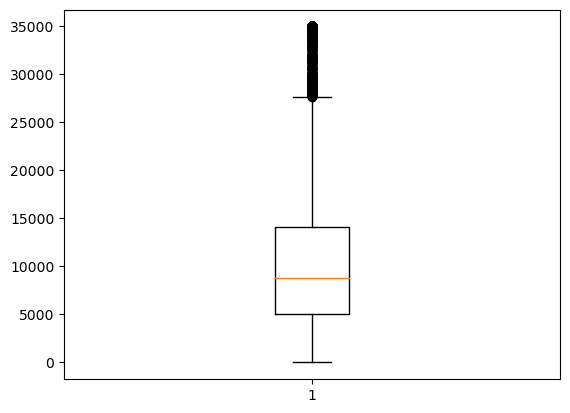

In [53]:

plt.boxplot(LoanData.funded_amnt_inv)
plt.show()
#by looking at the below box plot Not much difference found in funded_amnt_inv and the column looks distributed evenly.

Remove outliers from annual_inc column


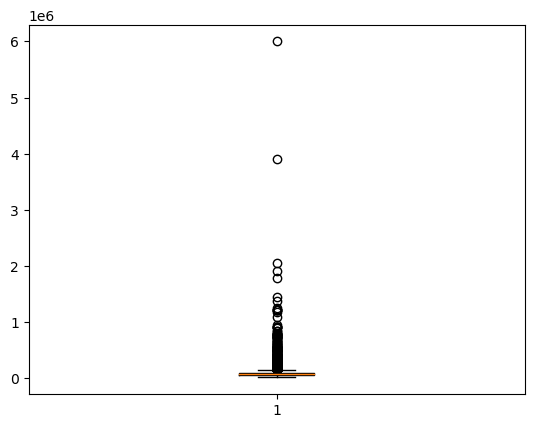

In [54]:

import matplotlib.pyplot as plt
plt.boxplot(LoanData.annual_inc)
plt.show()



In [55]:
LoanData.annual_inc.describe()

count    3.754400e+04
mean     6.940708e+04
std      6.467698e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [56]:
import numpy as np
print(np.quantile(LoanData.annual_inc,[0.5,0.75,0.95,0.99,1]))



[  60000.   83000.  142000.  235000. 6000000.]


In [57]:
#Since Quantile 1 value is huge and there is lot off difference compared to 0.99 quantile hence remove the rows above 6000000 annual income
LoanData=LoanData[LoanData.annual_inc<=np.quantile(LoanData.annual_inc,0.99)]
LoanData.shape

(37173, 41)

In [58]:
#After removing outliers below is the metrics of annual_inc
LoanData.annual_inc.describe()

count     37173.000000
mean      65939.461555
std       35236.990734
min        4000.000000
25%       40944.000000
50%       59000.000000
75%       81708.000000
max      235000.000000
Name: annual_inc, dtype: float64

# Univariate Analysis Unordered Categorical variables

'loan_status' Column distribition

loan_status
Fully Paid     31813
Charged Off     5360
Name: count, dtype: int64

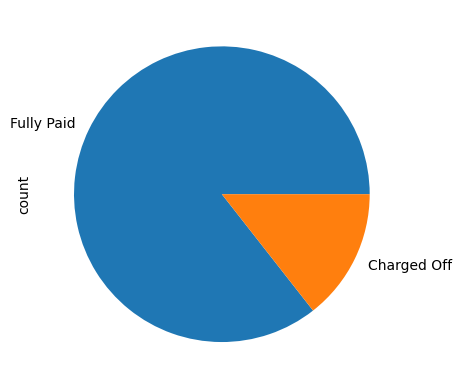

In [59]:
 
LoanData['loan_status'].value_counts().plot.pie()
LoanData['loan_status'].value_counts()

#Implies Fully Paid loans are more compared and form the max percentage of data given for analysis

In [60]:
#Replace None with Other as other makes more sense and none values are 3 only.
LoanData['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)
LoanData['home_ownership'].value_counts()

home_ownership
RENT        17999
MORTGAGE    16331
OWN          2744
OTHER          99
Name: count, dtype: int64

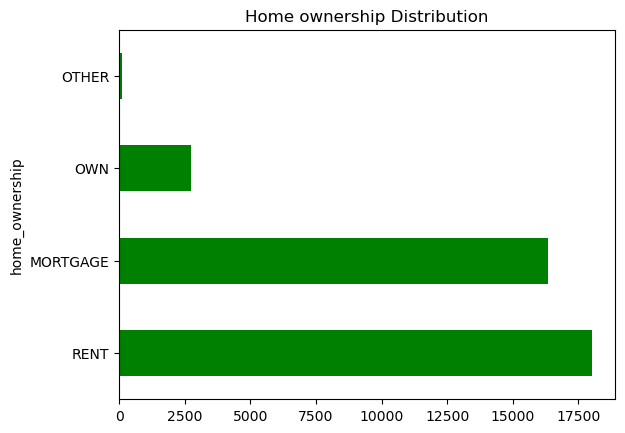

home_ownership
RENT        17999
MORTGAGE    16331
OWN          2744
OTHER          99
Name: count, dtype: int64

In [61]:
import matplotlib.pyplot as plt
LoanData['home_ownership'].value_counts().plot.barh(color='g')
plt.title('Home ownership Distribution')
plt.show()
LoanData['home_ownership'].value_counts()
#Implies most of the applicants have home ownership of Mortgage and rent. 

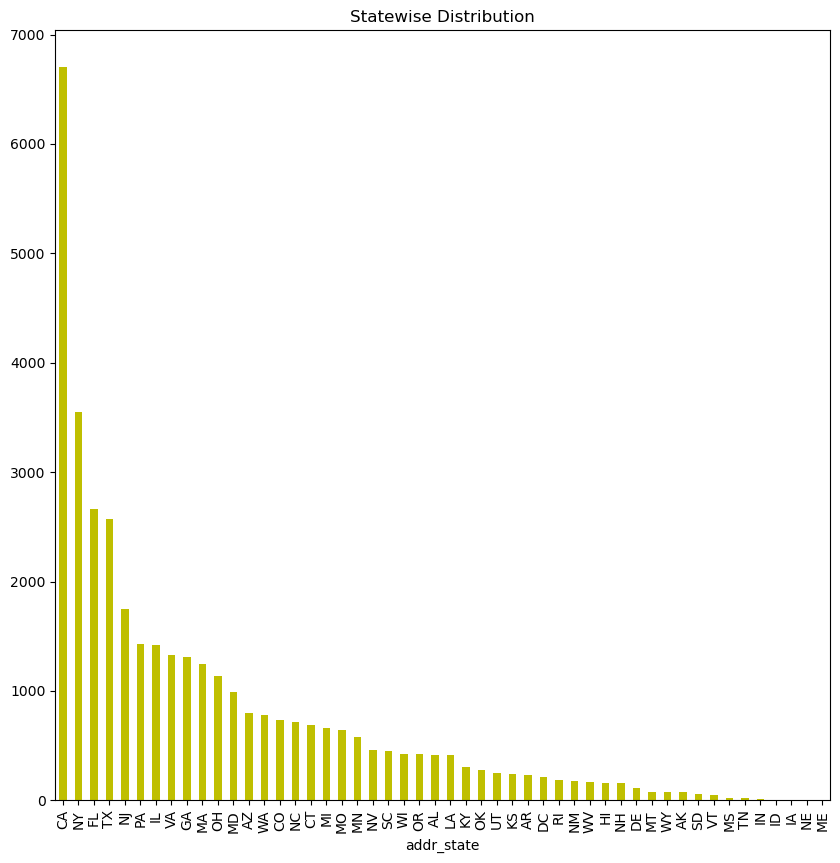

In [62]:
LoanData['addr_state'].value_counts().plot.bar(color='y',figsize=[10,10])
plt.title('Statewise Distribution')
plt.show()

#Implies state CA has maximum number of loan applicats compared to other states

# Univariate Analysis ordered Categorical variables 

grade
B    11268
A     9593
C     7593
D     4924
E     2569
F      938
G      288
Name: count, dtype: int64

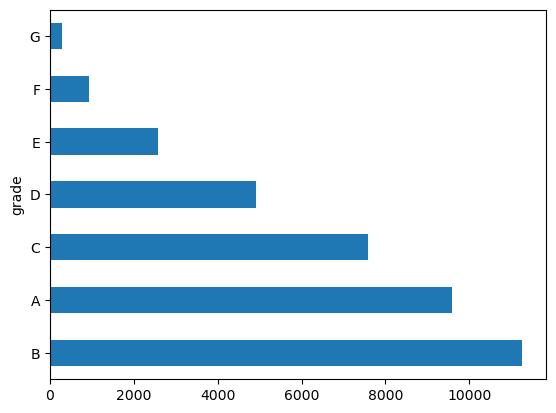

In [63]:

LoanData['grade'].value_counts().plot.barh()
LoanData['grade'].value_counts()
#Implies Grade B loans form the majority of Grades and Grade `G being lower

Create Buckets for interest rate column for further analysis

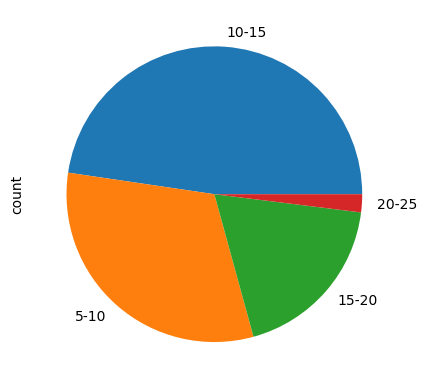

int_rate_Bucket
10-15    17720
5-10     11746
15-20     6975
20-25      732
Name: count, dtype: int64

In [64]:

LoanData['int_rate_Bucket']=pd.cut(LoanData.int_rate,[5,10,15,20,25],labels=['5-10','10-15','15-20','20-25'])
LoanData['int_rate_Bucket'].value_counts().plot.pie()
plt.show()
LoanData['int_rate_Bucket'].value_counts()
#implies most of the loans fall in interest range '10-15'

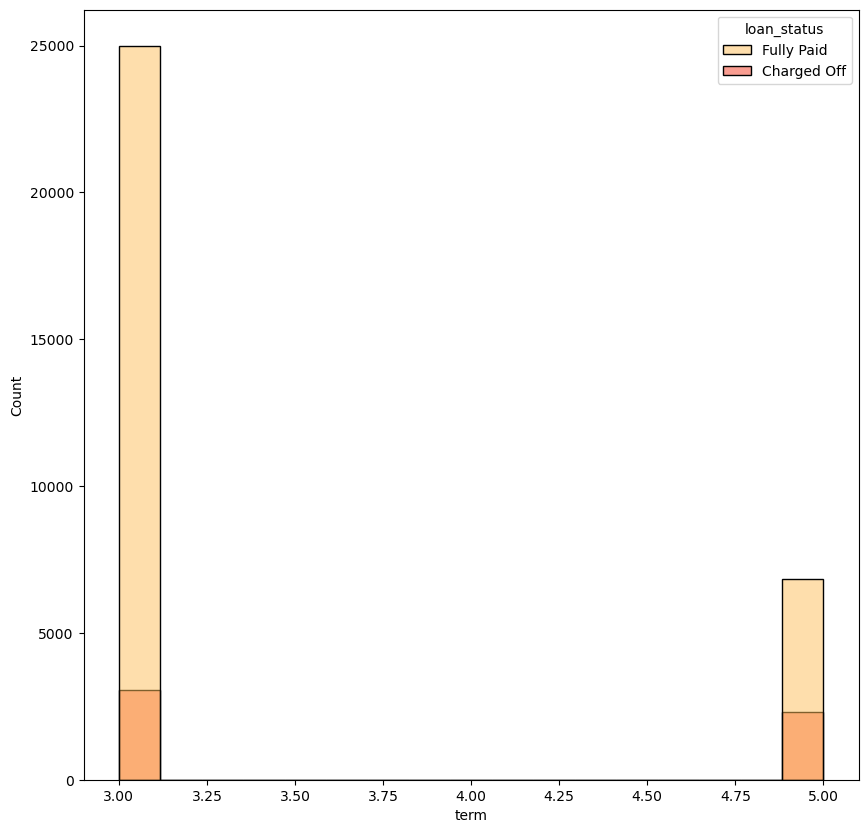

In [65]:
plt.figure(figsize=(10, 10)) 
sns.histplot(data=LoanData,x='term',hue='loan_status',palette='YlOrRd')
plt.show()

# Segmented Analysis

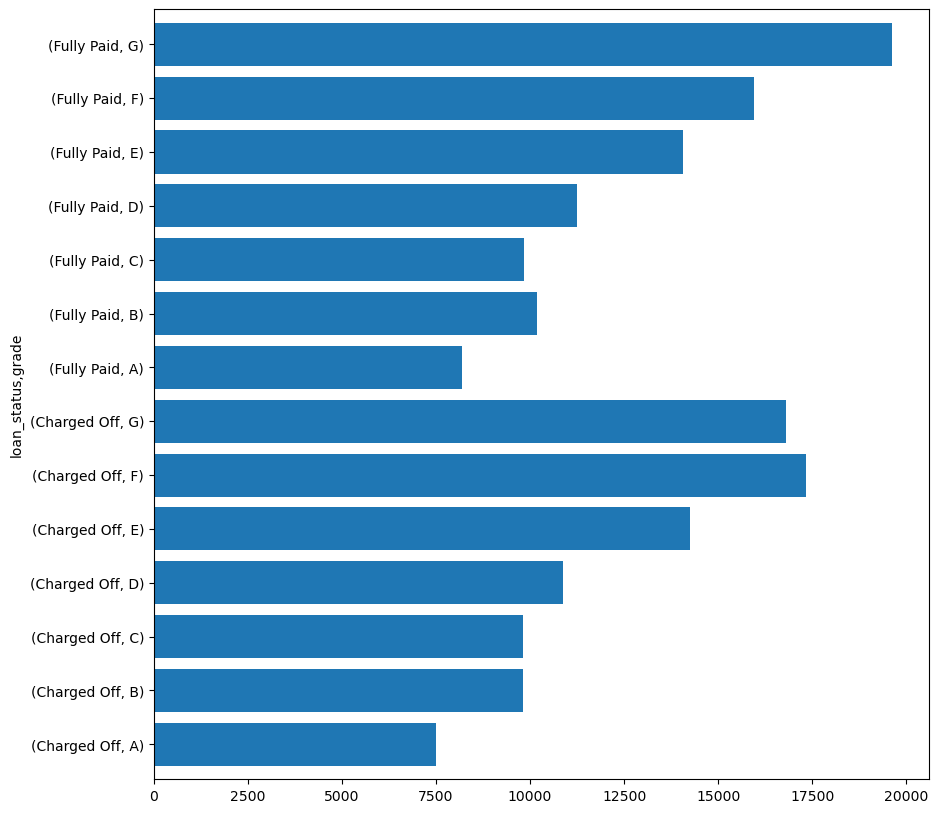

In [66]:

LoanData.groupby(by=['loan_status','grade'])['funded_amnt_inv'].mean().plot.barh(width=0.8,figsize=[10,10])
plt.show()

#Implies Fully paid Grade G loans have an highest average loan amount provided by Lending Club
#most charged off loans are grade E,F and grade G with an average loan amount greater than or equal to 130000

# Bivariate Analaysis

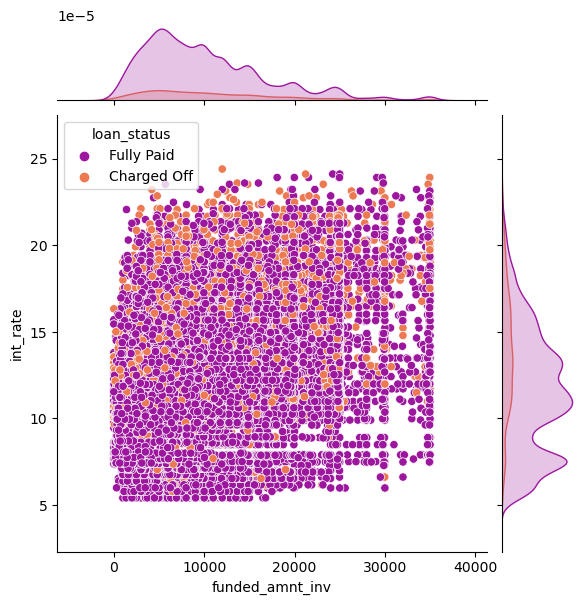

In [67]:

sns.jointplot(data=LoanData,y='int_rate',x='funded_amnt_inv',hue='loan_status',palette='plasma')
plt.show()
#Most Charged off loans have an iinterest rate greater than 12%


In [68]:
#from matplotlib import colormaps
#list(colormaps)

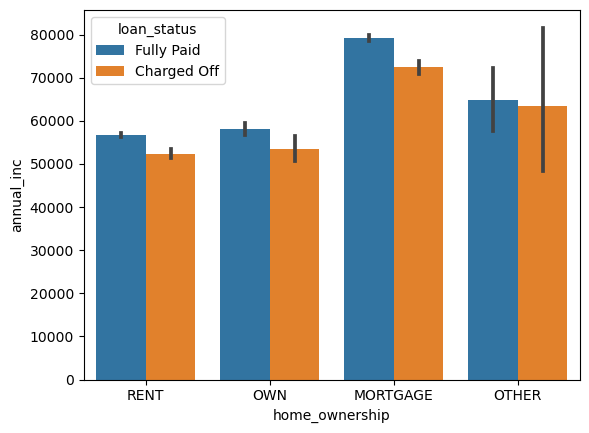

In [69]:
sns.barplot(data=LoanData,x='home_ownership',y='annual_inc',hue='loan_status')
plt.show()
#The applicants with Mortgage Home ownership have highest average of annual income for both fully paid and charged off loans

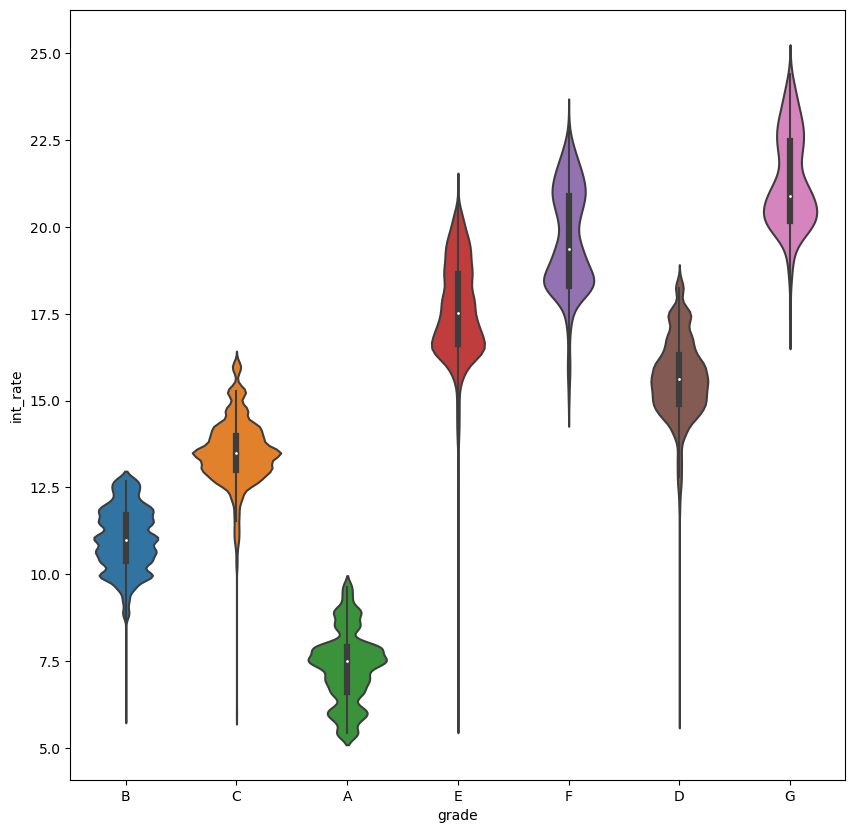

In [70]:
plt.figure(figsize=(10, 10)) 
sns.violinplot(data=LoanData,x='grade',y='int_rate')
plt.show()
#the Interquartile range of interest rate  is more for grade G loans compared to other ones 
#grade A loans  has least interest rates 

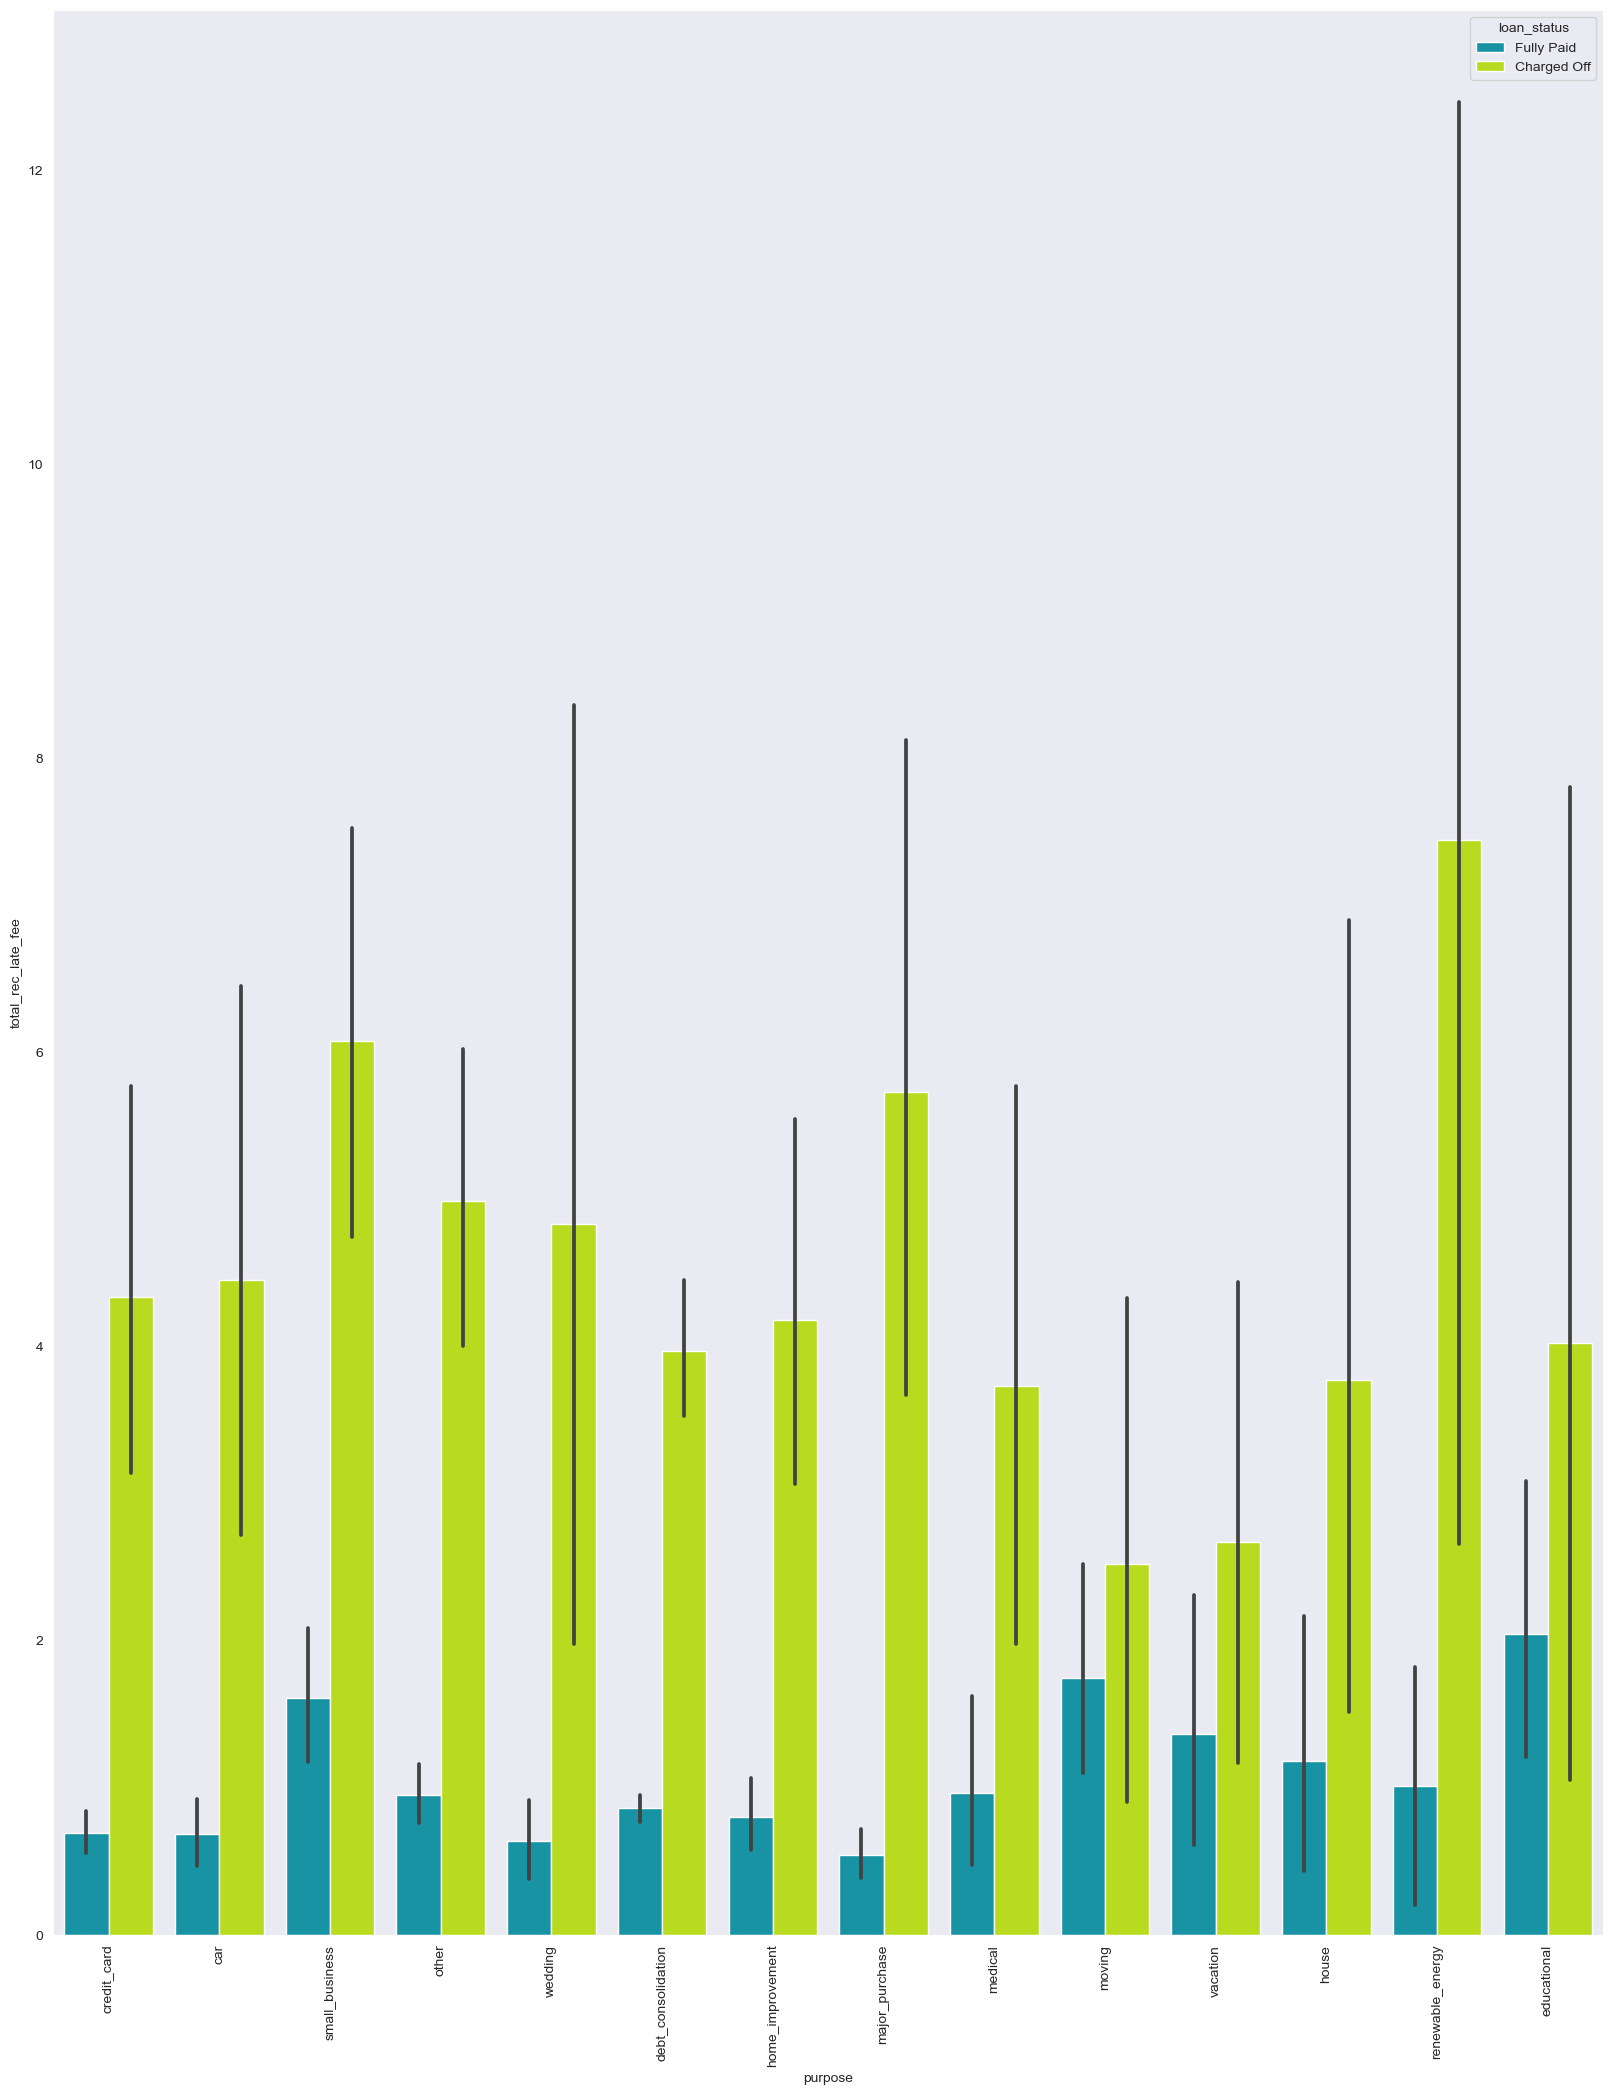

In [71]:
plt.figure(figsize=(20, 25)) 
sns.set_style('dark')
sns.barplot(data=LoanData,x='purpose',y='total_rec_late_fee',hue='loan_status',palette='nipy_spectral')
plt.xticks(rotation=90)
plt.show()
#the late fee paid is more for charged off loans with purpose Renewable energy follwed by the purpose small buisness

Pair plot of Numeric Variables

Before removing the skewness the values are below
1.1149784840221704
1.3883194674662236
After removing the skewness the values are below
0.24162934650479728
0.6167654604341095


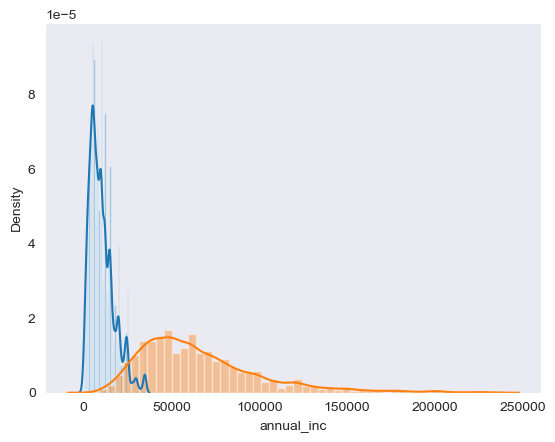

In [72]:
print("Before removing the skewness the values are below")
print(LoanData['funded_amnt_inv'].skew())
print(LoanData['annual_inc'].skew())
sns.distplot(LoanData['funded_amnt_inv'])
sns.distplot(LoanData['annual_inc'])
#implies both Funded amnt inv and annual inc are right skewed.if we use log10 we are getting nan and negative values.hence using
#Squarerroot

LoanDataSKew=LoanData.copy()
LoanDataSKew['funded_amnt_inv']=np.sqrt(LoanDataSKew['funded_amnt_inv'])
LoanDataSKew['annual_inc']=np.sqrt( LoanDataSKew['annual_inc'])

print("After removing the skewness the values are below")
print(LoanDataSKew['funded_amnt_inv'].skew())
print(LoanDataSKew['annual_inc'].skew())

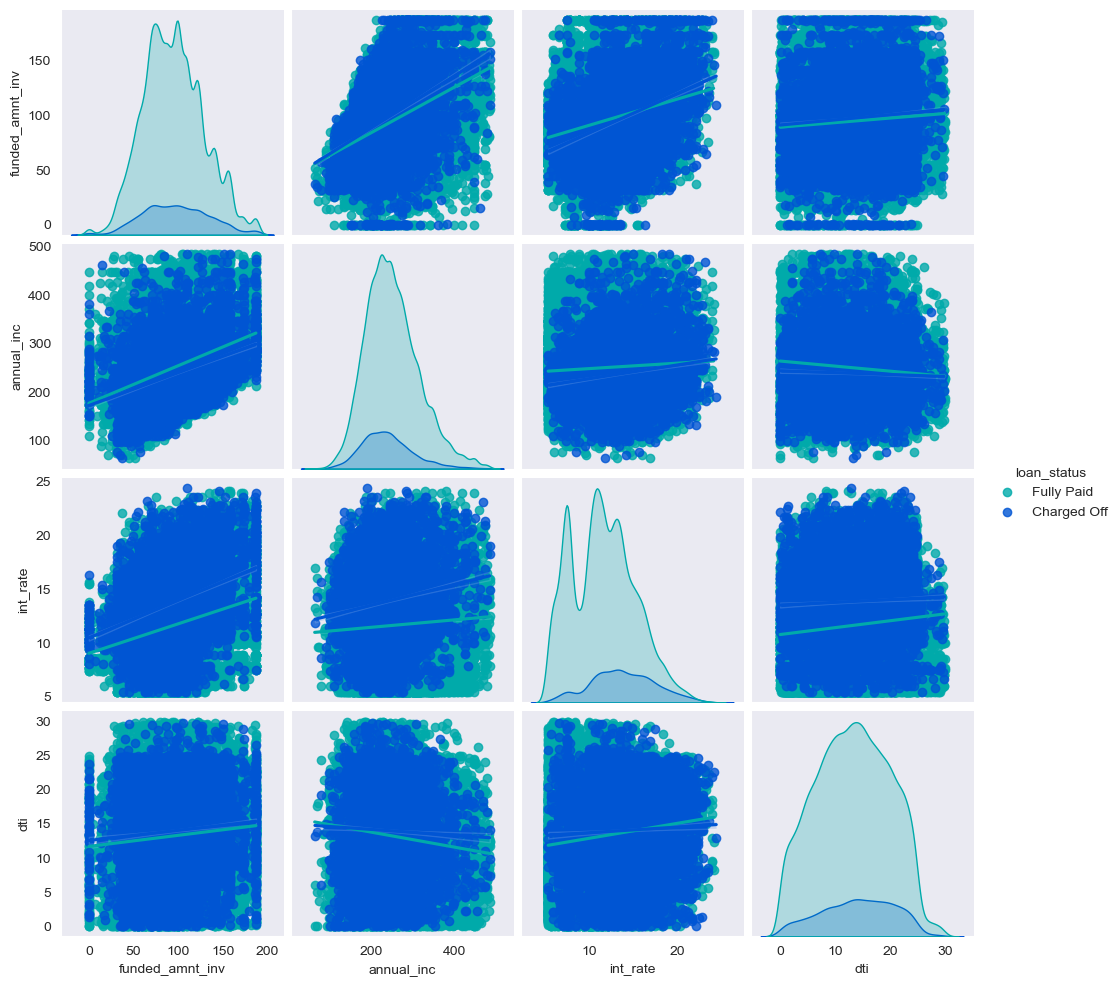

In [73]:

sns.pairplot(LoanDataSKew[['funded_amnt_inv','annual_inc','int_rate','dti','loan_status']],hue='loan_status',palette='winter_r',kind='reg')
plt.show()
#dti is inversely proportional to annual_income
#annual_income has direct proportion to funded amount inv  as the annual income increses more loan amount is provided.
#interest rates increase with dti

# Correlation of Numeric Variables

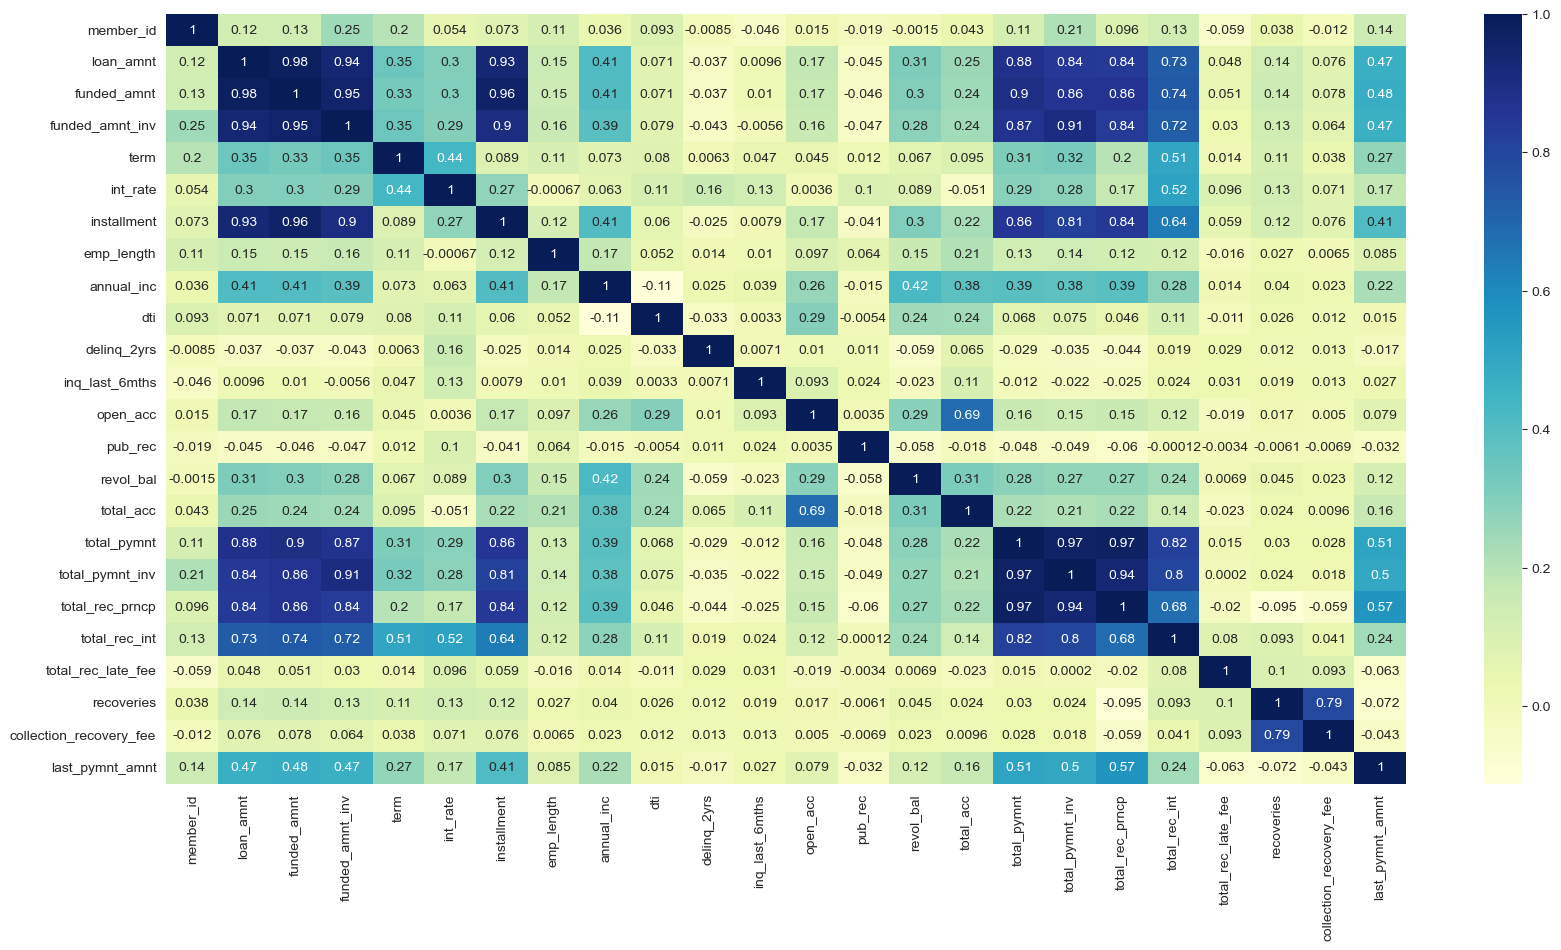

In [74]:
#print(LoanData['loan_status'].value_counts())
plt.figure(figsize=(20, 10)) 
numdatatypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
sns.heatmap(LoanData.select_dtypes(include=numdatatypes).corr(), cmap="YlGnBu", annot=True)
plt.show()

#dti has negative correlation for pub_dec column which is no of derogatory public records
#total payment inv which is the amount paid till date has a zero correlation with total late fee
#loan_amnt,Funded_amount,funded_amt_inv have a strong Correlation.

# Heatmap Correlation

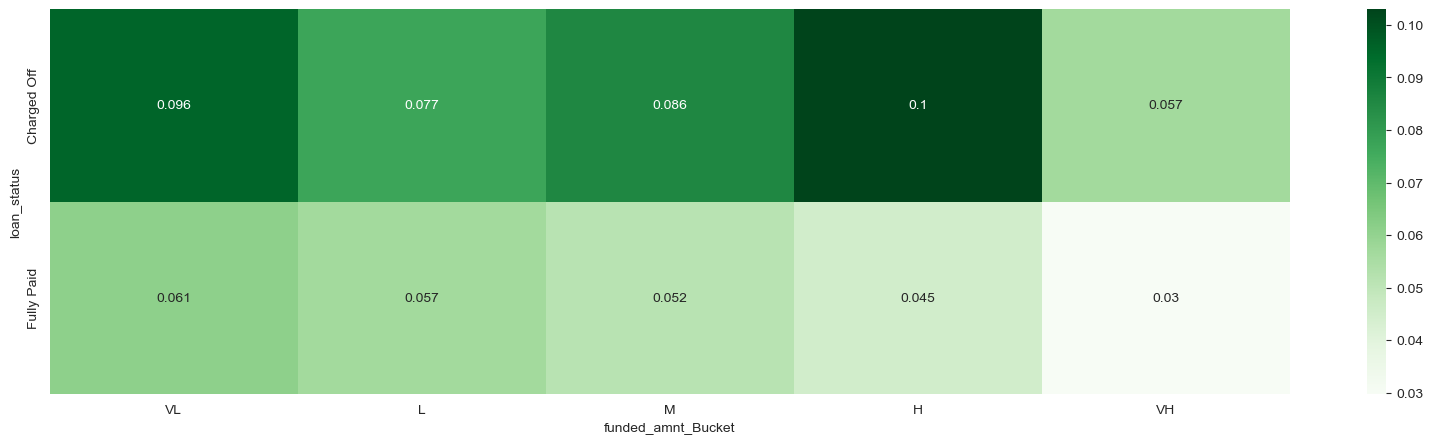

In [75]:
plt.figure(figsize=(20,5))
LoanData['funded_amnt_Bucket']=pd.qcut(LoanData.funded_amnt_inv,[0,0.2,0.4,0.6,0.8,1],['VL','L','M','H','VH'])
LoanData.head()
result=pd.pivot_table(data=LoanData,index='loan_status',columns='funded_amnt_Bucket',values='pub_rec')
sns.heatmap(result,cmap = "Greens", annot=True)
plt.show()
#higher  Charged off loans have a highest number of derogatory records fall in High range bucket of loans  and pose credit risk to lenders.



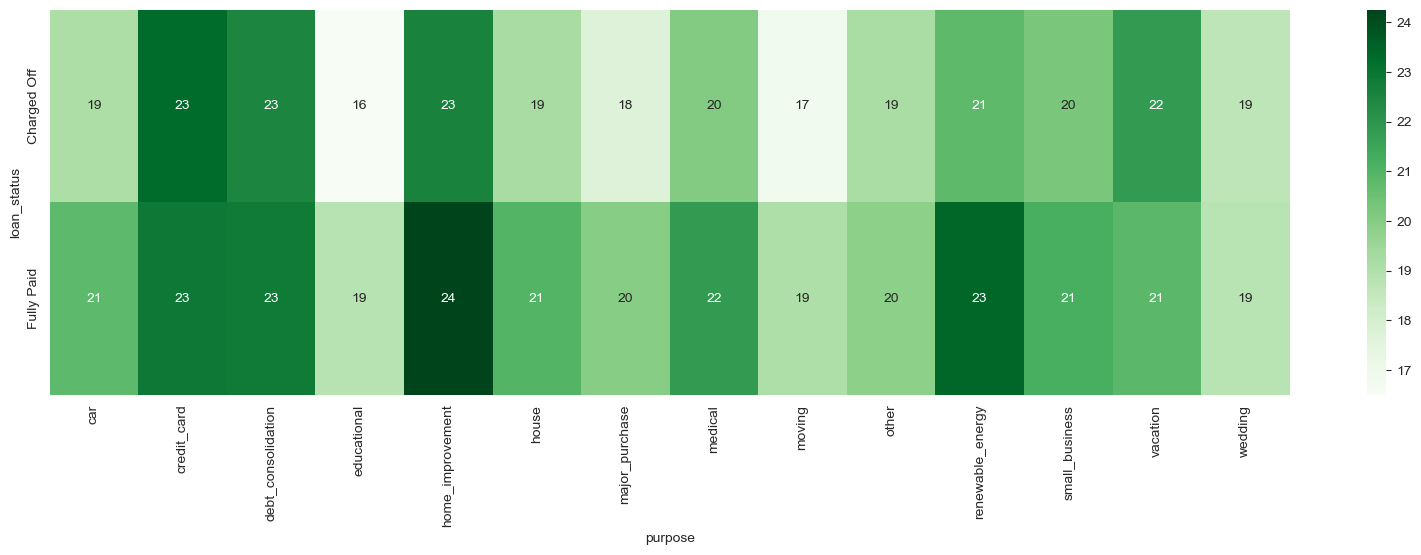

In [76]:
plt.figure(figsize=(20,5))
result=pd.pivot_table(data=LoanData,index='loan_status',columns='purpose',values='total_acc')
sns.heatmap(result,cmap = "Greens", annot=True)
plt.show()

#implies the charged off loans withthe purpose of home improvement and debt consolidation have more credit lines opened 


# Driven Metrics Analysis 

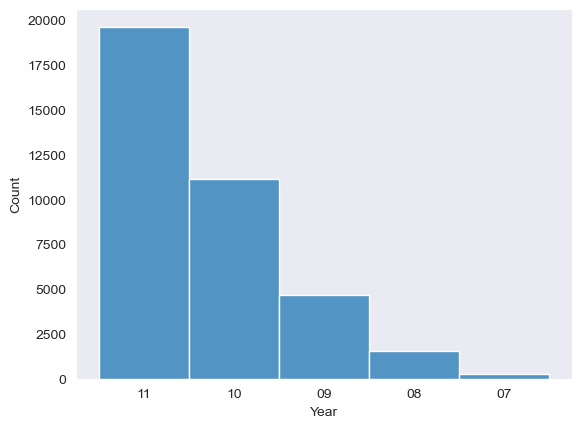

In [77]:
LoanData['Year']=LoanData.issue_d.apply(lambda x : x.split('-')[1])
LoanData['Year'].value_counts()
sns.histplot(LoanData['Year'])
plt.show()

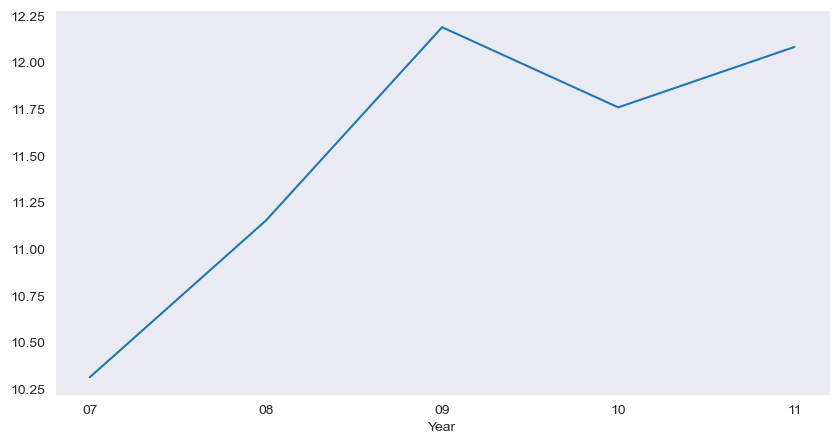

In [78]:
plt.figure(figsize=[10,5])
LoanData.groupby(by='Year')['int_rate'].mean().plot()
plt.show()
#The average interest rates were maximum during the years 2009 and 2011

In [79]:
#Extracting the Ratio of total payments to funded amount 
LoanData['paymenttoLoanRatio']=round(LoanData['total_pymnt_inv']/LoanData['funded_amnt_inv'],0)

<Figure size 400x500 with 0 Axes>

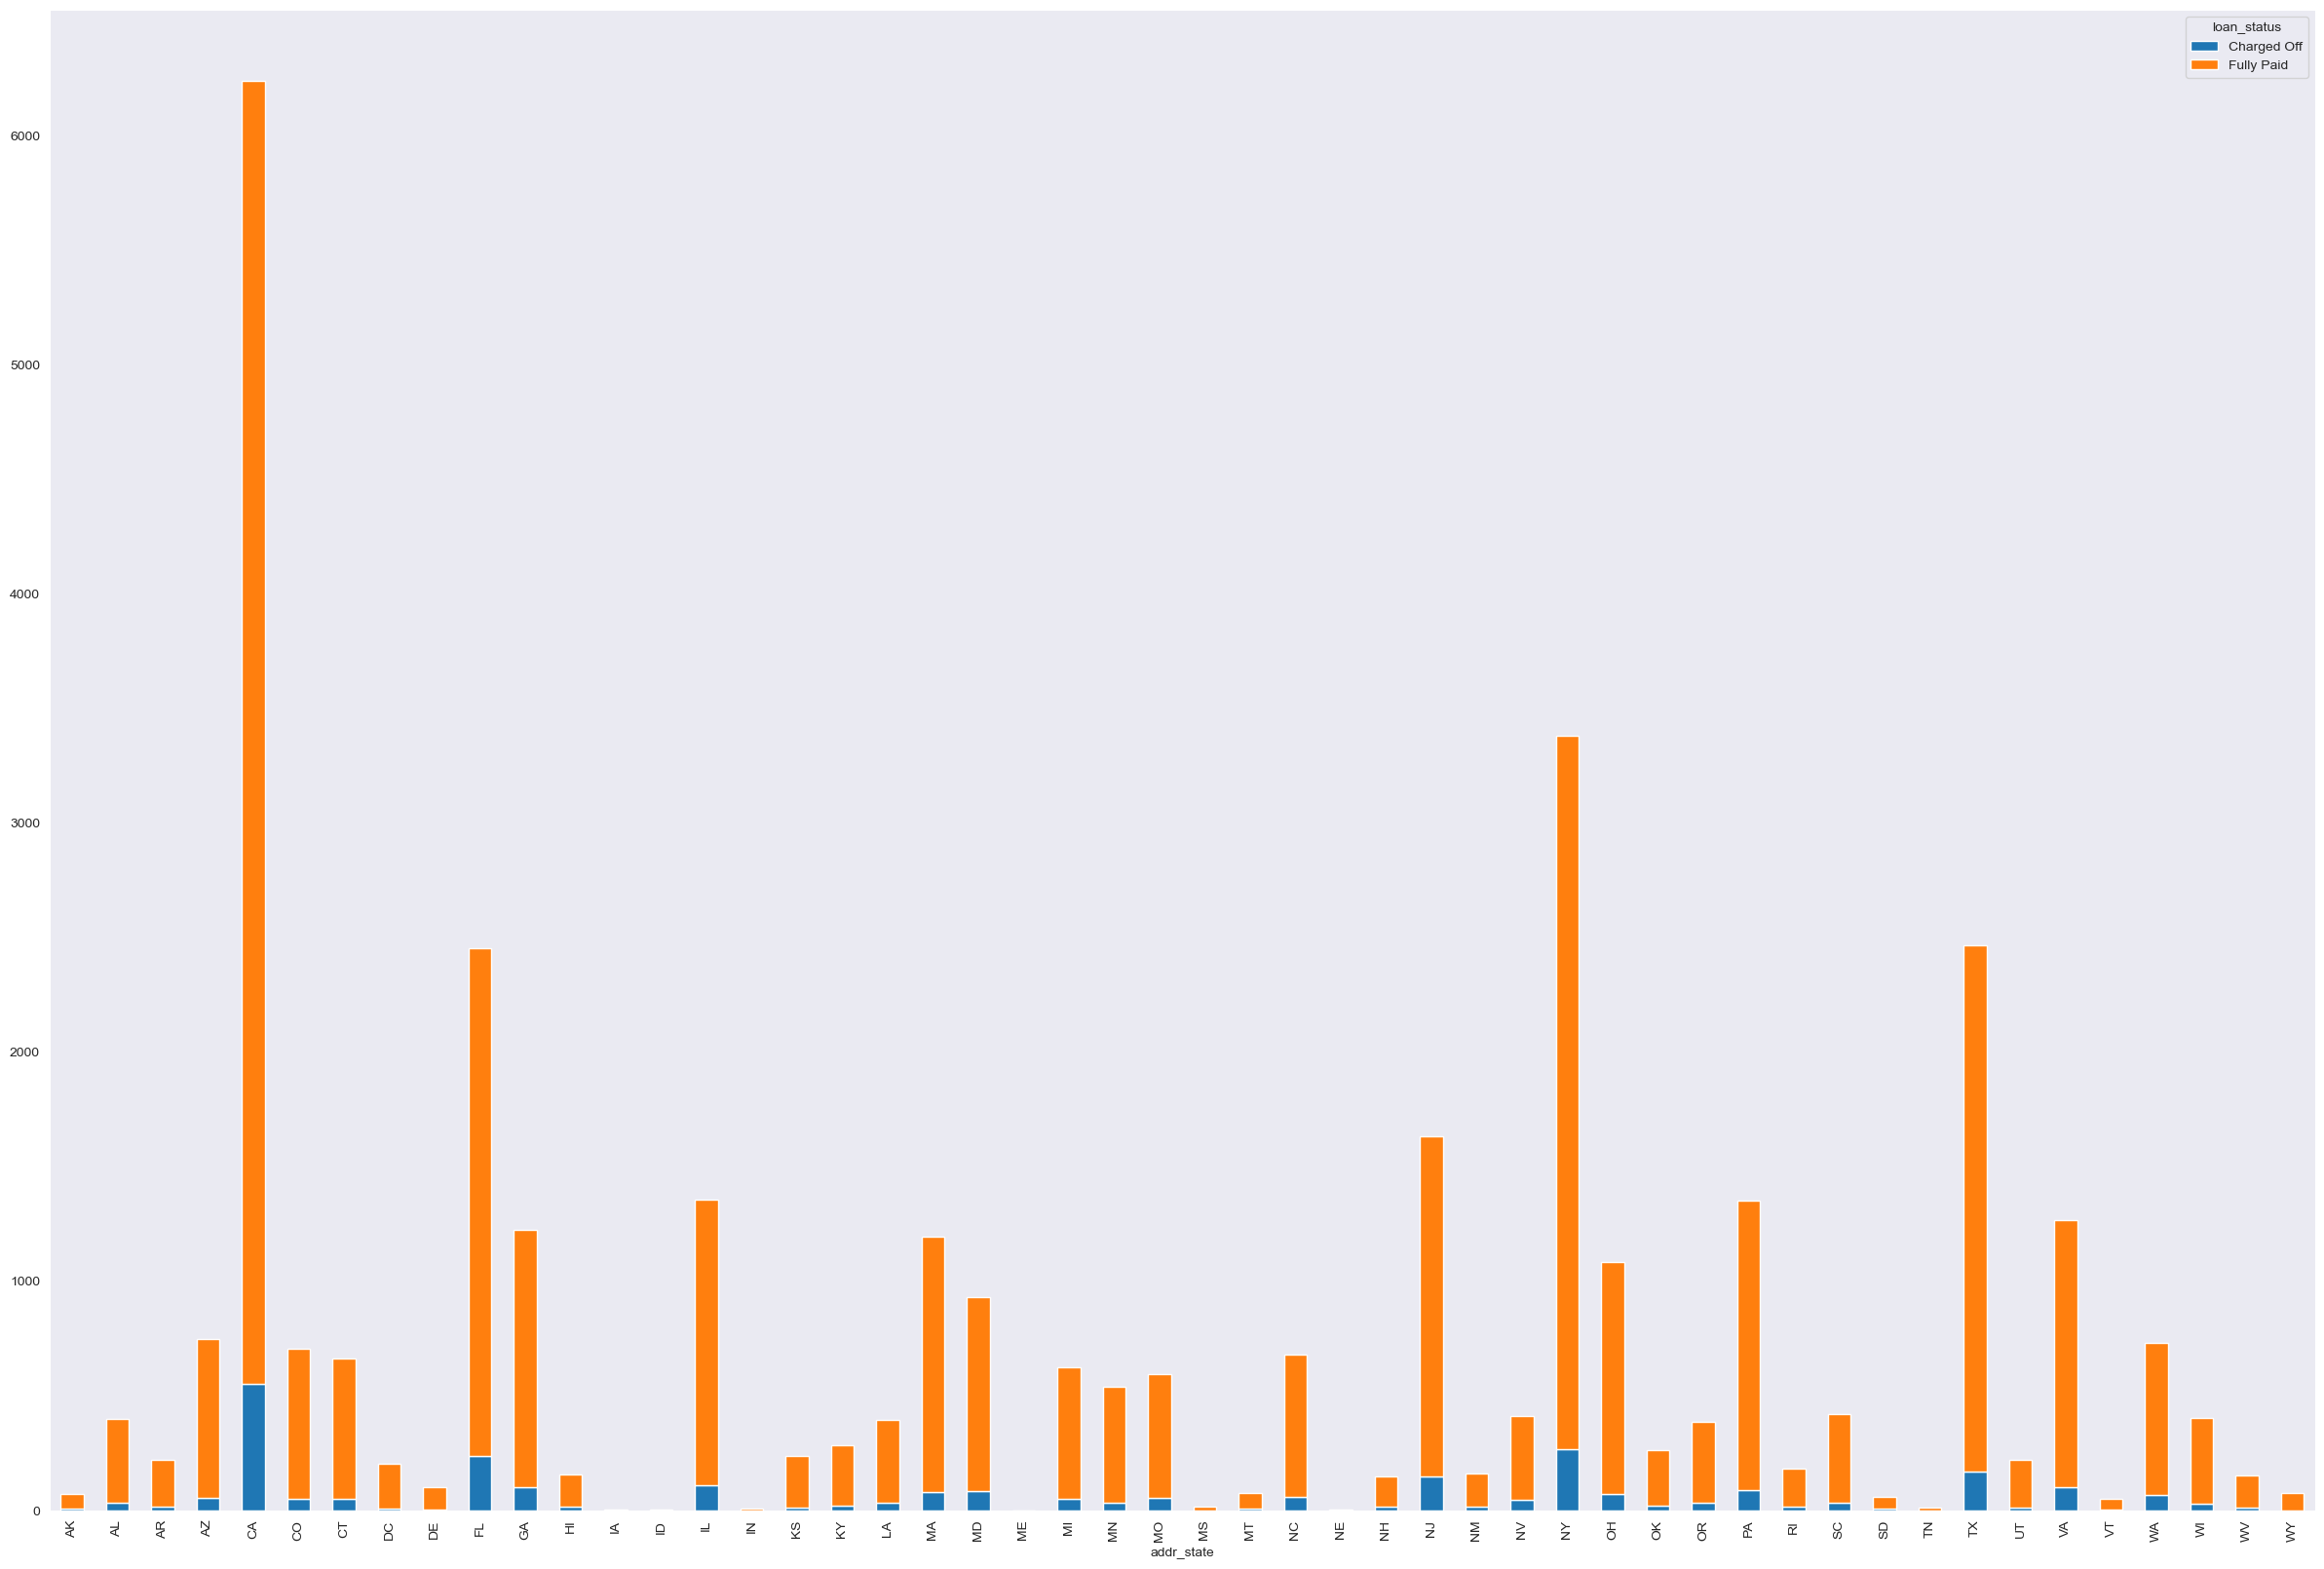

In [80]:

plt.figure(figsize=(4,5))
statewise=pd.pivot_table(data=LoanData,index='addr_state',columns='loan_status',values='paymenttoLoanRatio',aggfunc='sum')
statewise.plot(kind='bar',stacked='True',figsize=[30,20])
plt.show()

#State CA has the highest payments on the funded amount and can be looked as a safe option in future

# Summary


1.Loans with an interest rate exceeding 12% are more likely to be charged off compared to lower interest rate categories.
2.Individuals without home ownership are at a higher risk of loan default.
3.Applicants seeking loans for Renewable Energy and Small Business purposes have an elevated likelihood of defaulting.
4.Elevated Debt-to-Income (DTI) ratios pose a greater risk of defaults, as they may be linked to lower annual incomes.
5.A higher count of bankruptcies is associated with an increased probability of loan defaults.
6.Loans classified under Grade G have the highest likelihood of default among different loan grades.